# Sebastián Valdebenito Medel
# 21.260.056-3

# P4

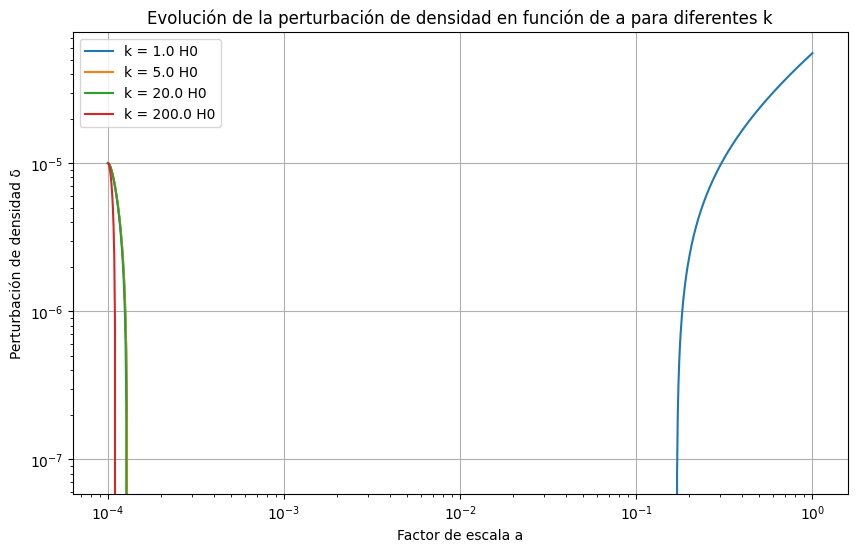

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros cosmológicos
H0 = 67 * 1e-3  # Hubble hoy en unidades de (Mpc)^-1 (para mantener consistencia)
c = 3e5  # velocidad de la luz en km/s
G = 4.3009e-9  # Constante gravitacional en unidades de (km/s)^2 * Mpc / M_solar
Omega_m0 = 0.3
Omega_r0 = 1e-4
Omega_Lambda0 = 1 - Omega_m0 - Omega_r0

# Función para Hubble en función del factor de escala
def H(a):
    return H0 * np.sqrt(Omega_r0 / a**4 + Omega_m0 / a**3 + Omega_Lambda0)

# Ecuación diferencial del sistema
def perturbation_equations(a, y, k):
    delta, theta, phi, phi_prime = y  # y representa [δ, θ, φ, φ']

    # Derivadas de Hubble y otras constantes cosmológicas
    H_a = H(a)
    H_prime = -H0 * (Omega_m0 / a**4 + 2 * Omega_r0 / a**5) / (2 * np.sqrt(Omega_r0 / a**4 + Omega_m0 / a**3 + Omega_Lambda0))
    
    # Ecuaciones del sistema según el modelo LCDM con w = 0
    delta_prime = -theta + 3 * phi_prime
    theta_prime = -H_a * theta + (k / a)**2 * phi  # Dividir k^2 por a^2 para tener unidades consistentes
    phi_double_prime = -phi * (H_a**2 + 2 * H_prime) - 3 * H_a * phi_prime

    return [delta_prime, theta_prime, phi_prime, phi_double_prime]

# Parámetros iniciales y valores de k en función de H0
k_values = [H0, 5 * H0, 20 * H0, 200 * H0]
initial_conditions = [1e-5, 1e-5, 1e-5, 0]  # Pequeñas perturbaciones iniciales para [δ, θ, φ, φ']
a_values = np.logspace(-4, 0, 1000)  # De 10^-4 a 1

# Soluciones para cada valor de k
solutions = {}
for k in k_values:
    sol = solve_ivp(perturbation_equations, [a_values[0], a_values[-1]], initial_conditions, args=(k,), t_eval=a_values, method='RK45')
    solutions[k] = sol.y[0]  # Solución para δ (perturbación de densidad)

# Gráficas de las soluciones
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(a_values, solutions[k], label=f'k = {k/H0} H0')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Factor de escala a')
plt.ylabel('Perturbación de densidad δ')
plt.title('Evolución de la perturbación de densidad en función de a para diferentes k')
plt.legend()
plt.grid(True)
plt.show()


Después de mucho rato me dió eso, pero ta malo:c

# P5

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


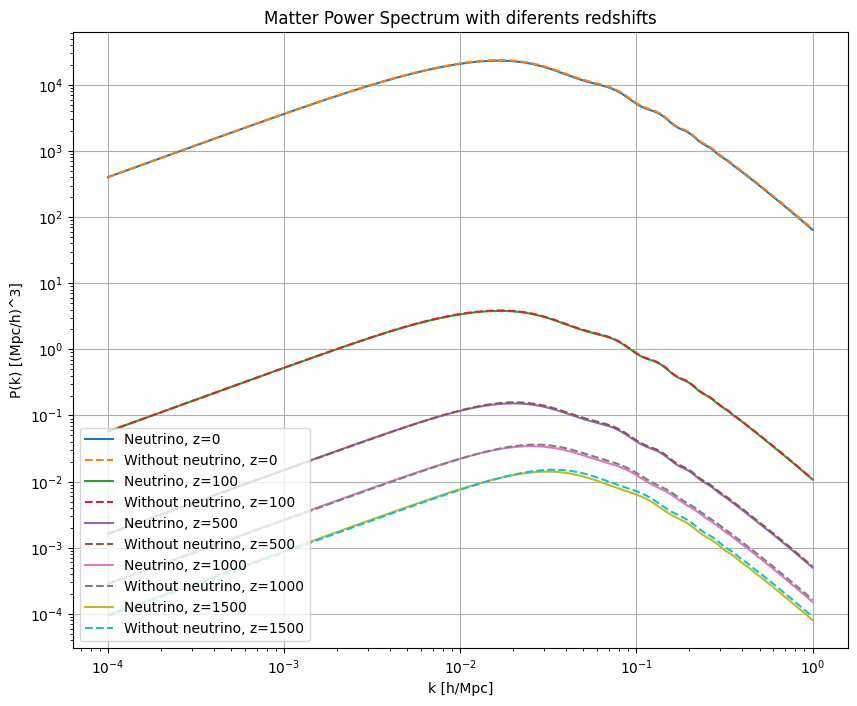

In [3]:
import camb
from camb import model, initialpower
import matplotlib.pyplot as plt
import numpy as np
from camb import CAMBparams, get_results

# Function to calculate de matter power spectrum
def get_matter_power_spectrum(H0, omega_bh2, omega_ch2, mnu, ns, redshifts, default_nu=False):
    pars = camb.CAMBparams()

    # Configuration of cosmological parameters
    if default_nu:
        pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=0)
    else:
        pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=0, mnu=mnu)

    pars.set_dark_energy()  
    pars.InitPower.set_params(ns=ns)  
    
    # Redshifts
    pars.set_matter_power(redshifts=redshifts, kmax=2.0)
    
    results = camb.get_results(pars)
    kh, zs, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
    return kh, zs, pk

# Cosmogical parameters
H0 = 67.4  # Hubble in km/s/Mpc
omega_m = 0.315  # Omega of total matter
omega_ch2 = 0.120  # Dark matter density
omega_bh2 = 0.0224  # Barionic density
ns = 0.965  
redshifts = [0, 100, 500, 1000, 1500] 

# With neutroninos
kh, zs, pk_default_nu = get_matter_power_spectrum(H0, omega_bh2, omega_ch2, mnu=None, ns=ns, redshifts=redshifts, default_nu=True)

# Without neutrinos (mnu = 0)
kh, zs, pk_no_nu = get_matter_power_spectrum(H0, omega_bh2, omega_ch2, mnu=0.0, ns=ns, redshifts=redshifts)

plt.figure(figsize=(10, 8))
for i, z in enumerate(redshifts):
    plt.loglog(kh, pk_default_nu[i], label=f'Neutrino, z={z}')
    plt.loglog(kh, pk_no_nu[i], linestyle='--', label=f'Without neutrino, z={z}')

plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [(Mpc/h)^3]')
plt.title('Matter Power Spectrum with diferents redshifts')
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.show()


# P6

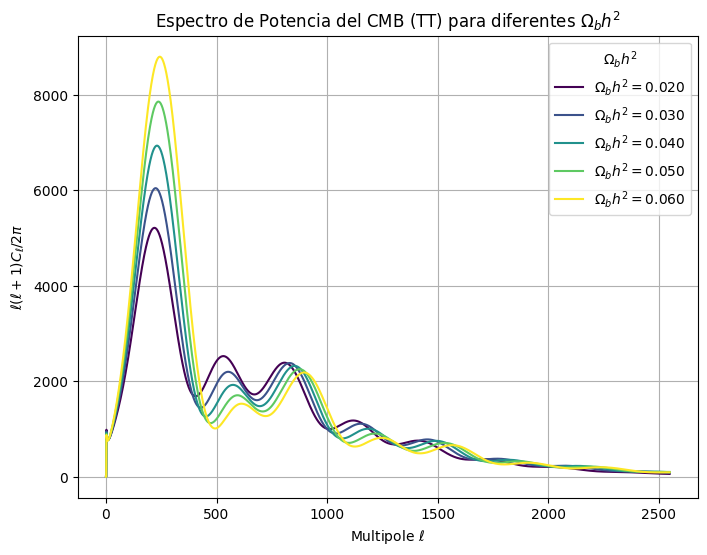

In [29]:
# Constantes cosmológicas
H0 = 67.4
omega_ch2 = 0.120
ns = 0.965

# Rango de valores para Omega_b h^2
omega_b_values = np.linspace(0.02, 0.06, 5)  # Valores entre 0.02 y 0.06

# Configuración inicial de parámetros CAMB
params = CAMBparams()
params.set_cosmology(H0=H0, omch2=omega_ch2, omk=0, tau=0.06)
params.set_dark_energy(w=-1)
params.InitPower.set_params(ns=ns, r=0)
params.set_for_lmax(2500, lens_potential_accuracy=0)

# Configuración de la figura
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(omega_b_values)))

# Graficar espectros de potencia TT para diferentes valores de Omega_b h^2
for omega_b, color in zip(omega_b_values, colors):
    params.set_cosmology(H0=H0, ombh2=omega_b, omch2=omega_ch2, omk=0)
    results = get_results(params)
    powers = results.get_cmb_power_spectra(params, CMB_unit="muK")
    
    ell = np.arange(powers['total'].shape[0])
    cl_TT = powers['total'][:, 0]
    plt.plot(ell, cl_TT, label=rf'$\Omega_b h^2 = {omega_b:.3f}$', color=color)

# Personalización del gráfico
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell (\ell + 1) C_\ell / 2\pi$')
plt.title(r'Espectro de Potencia del CMB (TT) para diferentes $\Omega_b h^2$')
plt.legend(title=r'$\Omega_b h^2$')
plt.grid(True)
plt.show()

Al aumentar la densidad bariónica, se incrementa la inercia del plasma de fotones y bariones, lo que amplifica las oscilaciones de compresión y rarefacción. Este fenómeno ocurre porque los bariones, al interactuar con los fotones, aumentan la presión en las regiones de compresión, intensificando las oscilaciones acústicas. Por ejemplo se observa que el primer pico es significativamente más alto en el caso de mayor densidad bariónica, reflejando esta amplificación de las oscilaciones.

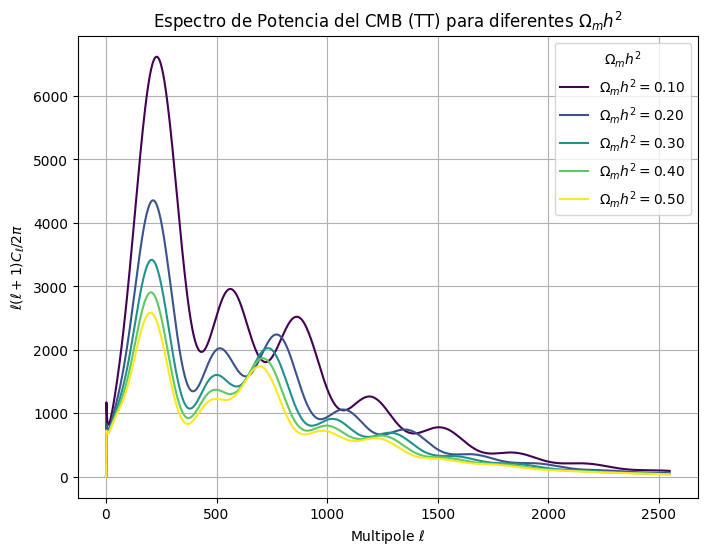

In [28]:
# Rango de valores para Omega_m h^2
omega_m_values = np.linspace(0.1, 0.5, 5)  # Valores entre 0.1 y 0.5

# Configuración de la figura
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(omega_m_values)))

# Graficar espectros de potencia TT para diferentes valores de Omega_m h^2
for omega_m, color in zip(omega_m_values, colors):
    # Calcular omch2 a partir de omega_m y omega_b
    omch2 = omega_m - 0.022  # Asumiendo ombh2 = 0.022 como valor fijo de bariones
    params.set_cosmology(H0=H0, ombh2=0.022, omch2=omch2, omk=0)
    results = get_results(params)
    powers = results.get_cmb_power_spectra(params, CMB_unit="muK")
    
    ell = np.arange(powers['total'].shape[0])
    cl_TT = powers['total'][:, 0]
    plt.plot(ell, cl_TT, label=rf'$\Omega_m h^2 = {omega_m:.2f}$', color=color)

# Personalización del gráfico
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell (\ell + 1) C_\ell / 2\pi$')
plt.title(r'Espectro de Potencia del CMB (TT) para diferentes $\Omega_m h^2$')
plt.legend(title=r'$\Omega_m h^2$')
plt.grid(True)
plt.show()

Por otro lado, la densidad de materia total ($\Omega_m h^2$), que incluye tanto materia bariónica como materia oscura, influye en la tasa de expansión del universo y en la escala angular de las oscilaciones acústicas. Un aumento en $\Omega_m h^2$ conduce a una mayor atracción gravitacional, lo que ralentiza la expansión del universo y permite que las oscilaciones acústicas completen más ciclos antes del desacoplamiento. Esto provoca un desplazamiento de los picos hacia mayores números de multipolo ($\ell$), es decir, hacia la derecha en el espectro de potencia, indicando estructuras de menor escala angular.